# Correlation Analysis Demonstration

This notebook demonstrates how to perform correlation analysis using the Pearson, Spearman, and Kendall's Tau correlation coefficients.

## Import Required Libraries

Import the necessary libraries including matplotlib, seaborn, and scipy.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from scipy.stats import pearsonr, spearmanr, kendalltau

## Load Dataset

Load the Tips dataset from seaborn for correlation analysis.

**Variables:**
- **Pearson**: "total_bill" and "tip" (continuous, linear relationship)
- **Spearman**: "total_bill" and "size" (non-linear, but monotonic relationship)
- **Kendall's Tau**: "day" (ordinal) and "time" (ordinal, with ties expected)

In [2]:
# Load real-world dataset: Tips dataset.
data = sns.load_dataset("tips")

# Display first few rows of the dataset.
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Calculate Correlation Coefficients

Calculate Pearson, Spearman, and Kendall's Tau correlation coefficients.

In [3]:
# Pearson correlation (continuous, linear relationship between total_bill and
# tip).
pearson_corr, _ = pearsonr(data["total_bill"], data["tip"])
print(f"\nPearson correlation (total_bill vs tip): {pearson_corr:.3f}.")

# Spearman correlation (non-linear but monotonic relationship between
# total_bill and size).
spearman_corr, _ = spearmanr(data["total_bill"], data["size"])
print(f"Spearman correlation (total_bill vs size): {spearman_corr:.3f}.")

# Kendall's Tau (rank correlation between day and time, both ordinal variables)
# Convert day into numeric ordinal values using LabelEncoder for Kendall's Tau.
label_encoder = LabelEncoder()
data["day_num"] = label_encoder.fit_transform(data["day"])

label_encoder = LabelEncoder()
data["time_num"] = label_encoder.fit_transform(data["time"])

kendall_corr, _ = kendalltau(data["day_num"], data["time_num"])
print(f"Kendall's Tau correlation (day vs time): {kendall_corr:.3f}.")


Pearson correlation (total_bill vs tip): 0.676.
Spearman correlation (total_bill vs size): 0.605.
Kendall's Tau correlation (day vs time): 0.601.


## Visualize Pearson Correlation

Create a pair plot to visualize the Pearson correlation between total bill and tip.

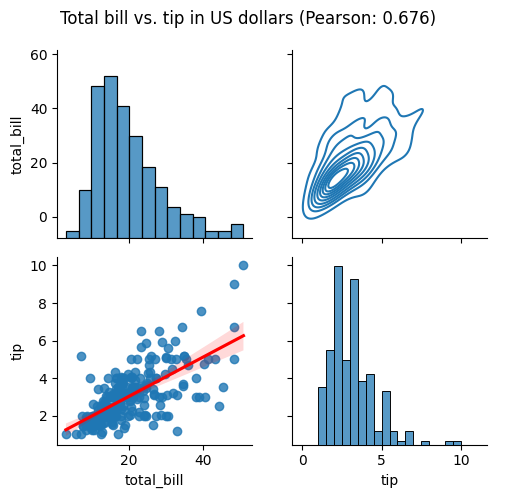

In [4]:
# Plot for Pearson correlation.
g = sns.PairGrid(data[["total_bill", "tip"]])
g.map_diag(sns.histplot)
g.map_lower(sns.regplot, line_kws={"color": "red"})
g.map_upper(sns.kdeplot)
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle(
    f"Total bill vs. tip in US dollars (Pearson: {pearson_corr:.3f})")
g.add_legend()

## Visualize Spearman Correlation

Create a pair plot to visualize the Spearman correlation between total bill and party size.

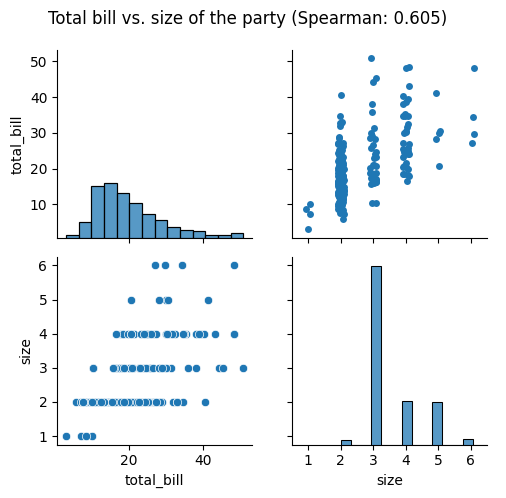

In [5]:
# Plot for Spearman correlation.
g = sns.PairGrid(data[["total_bill", "size"]])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.stripplot)
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle(
    f"Total bill vs. size of the party (Spearman: {spearman_corr:.3f})")
g.add_legend()

## Visualize Kendall's Tau Correlation

Create a pair plot to visualize Kendall's Tau correlation between day and time.

/Users/fabricio/.miniforge3/envs/damin2025/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fabricio/.miniforge3/envs/damin2025/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fabricio/.miniforge3/envs/damin2025/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fabricio/.miniforge3/envs/damin2025/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

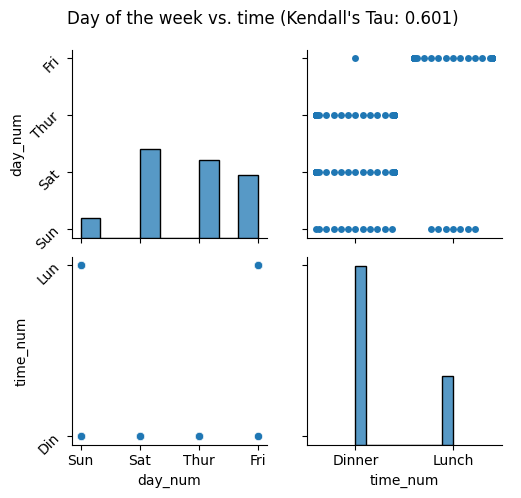

In [6]:
# Plot for Kendall's Tau correlation.
g = sns.PairGrid(data[["day_num", "time_num"]])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.swarmplot)
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle(
    f"Day of the week vs. time (Kendall's Tau: {kendall_corr:.3f})")

# Set custom tick labels.
day_labels = data["day"].unique()
time_labels = data["time"].unique()

g.axes[0, 0].set_xticks(range(len(day_labels)))
g.axes[0, 0].set_xticklabels(day_labels)
g.axes[0, 0].set_yticks(range(len(day_labels)))
g.axes[0, 0].set_yticklabels(day_labels, rotation=45)
g.axes[1, 0].set_yticks(range(len(time_labels)))
g.axes[1, 0].set_yticklabels([label[:3] for label in time_labels], rotation=45)
g.axes[1, 1].set_xticks(range(len(time_labels)))
g.axes[1, 1].set_xticklabels(time_labels)

g.add_legend()

plt.show()